### Ejercicio 2: Clasificación con Árboles de Decisión (Tic-Tac-Toe)

**Tarea:** Entrenar un modelo de clasificación utilizando árboles de decisión en el conjunto de datos tic-tac-toe.csv para decidir si el resultado es positivo (gana 'x') o negativo.
**Sub-tarea:** Graficar el árbol generado.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
import os
import urllib.request

file_path = 'tic-tac-toe.csv'

# Intentar cargar archivo local primero
if not os.path.exists(file_path):
    print("Archivo no encontrado localmente. Intentando descargar desde UCI ML Repository...")
    try:
        # URL del dataset Tic-Tac-Toe Endgame en UCI ML Repository
        url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
        
        # Descargar el archivo
        urllib.request.urlretrieve(url, file_path)
        print("✓ Dataset descargado exitosamente.")
    except Exception as e:
        print(f"Error al descargar: {e}")
        print("Creando dataset sintético para demostración...")

# Intentar cargar el dataset
try:
    # Definir nombres de columnas (el dataset original no tiene encabezados)
    column_names = ['top-left', 'top-middle', 'top-right',
                    'middle-left', 'middle-middle', 'middle-right',
                    'bottom-left', 'bottom-middle', 'bottom-right',
                    'class']
    
    df_ttt = pd.read_csv(file_path, header=None, names=column_names)
    print("✓ Dataset cargado exitosamente.")
    print(f"Dimensiones: {df_ttt.shape}")
    
except FileNotFoundError:
    print("\nCreando dataset sintético de Tic-Tac-Toe...")
    
    # Crear un dataset sintético representativo
    import numpy as np
    from sklearn.datasets import make_classification
    
    # Generar datos sintéticos
    n_samples = 958  # Tamaño similar al dataset original
    
    # Posibles valores para cada casilla
    values = ['x', 'o', 'b']  # x=jugador, o=oponente, b=blank
    
    # Generar tableros aleatorios
    data = []
    for _ in range(n_samples):
        board = [np.random.choice(values) for _ in range(9)]
        
        # Determinar el resultado (simplificado: si hay más 'x' que 'o', es positivo)
        x_count = board.count('x')
        o_count = board.count('o')
        
        # Lógica simple para determinar ganador
        if x_count >= 5:
            result = 'positive'
        else:
            result = 'negative'
        
        board.append(result)
        data.append(board)
    
    # Crear DataFrame
    column_names = ['top-left', 'top-middle', 'top-right',
                    'middle-left', 'middle-middle', 'middle-right',
                    'bottom-left', 'bottom-middle', 'bottom-right',
                    'class']
    
    df_ttt = pd.DataFrame(data, columns=column_names)
    print("✓ Dataset sintético creado.")
    print(f"Dimensiones: {df_ttt.shape}")
    print("\nNota: Este es un dataset sintético para fines educativos.")

# Mostrar información del dataset
print("\nPrimeras filas del dataset original:")
display(df_ttt.head(10))

print("\nDistribución de clases:")
print(df_ttt['class'].value_counts())

print("\nValores únicos por columna:")
for col in df_ttt.columns[:-1]:  # Excluir la columna 'class'
    print(f"  {col}: {df_ttt[col].unique()}")

# Preprocesamiento: Codificar variables categóricas
# Separar características y objetivo
X = df_ttt.drop('class', axis=1)
y = df_ttt['class']

# Codificación One-Hot para las características
X_encoded = pd.get_dummies(X)

# Codificar la variable objetivo (positive=1, negative=0)
y_encoded = y.map({'positive': 1, 'negative': 0})

print("\n✓ Preprocesamiento completado.")
print(f"Características después de One-Hot Encoding: {X_encoded.shape[1]}")
print("\nPrimeras filas del dataset codificado:")
display(X_encoded.head())

✓ Dataset cargado exitosamente.
Dimensiones: (958, 10)

Primeras filas del dataset original:


,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
5,x,x,x,x,o,o,b,b,o,positive
6,x,x,x,x,o,b,o,o,b,positive
7,x,x,x,x,o,b,o,b,o,positive
8,x,x,x,x,o,b,b,o,o,positive
9,x,x,x,x,b,o,o,o,b,positive



Distribución de clases:
class
positive    626
negative    332
Name: count, dtype: int64

Valores únicos por columna:
  top-left: ['x' 'o' 'b']
  top-middle: ['x' 'o' 'b']
  top-right: ['x' 'o' 'b']
  middle-left: ['x' 'o' 'b']
  middle-middle: ['o' 'b' 'x']
  middle-right: ['o' 'b' 'x']
  bottom-left: ['x' 'o' 'b']
  bottom-middle: ['o' 'x' 'b']
  bottom-right: ['o' 'x' 'b']

✓ Preprocesamiento completado.
Características después de One-Hot Encoding: 27

Primeras filas del dataset codificado:


,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,middle-left_b,...,middle-right_x,bottom-left_b,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x
0,False,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
1,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
3,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
4,False,False,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [3]:
# Entrenamiento del Modelo de Árbol de Decisión
# Dividimos los datos, entrenamos el DecisionTreeClassifier y evaluamos su precisión.

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# Crear y entrenar el modelo
model_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
model_dt.fit(X_train, y_train)

print("\n✓ Modelo de Árbol de Decisión entrenado exitosamente.")
print(f"  - Profundidad del árbol: {model_dt.get_depth()}")
print(f"  - Número de hojas: {model_dt.get_n_leaves()}")

# Realizar predicciones y evaluar
y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n" + "="*60)
print("RESULTADOS DE EVALUACIÓN - ÁRBOL DE DECISIÓN")
print("="*60)
print(f"Precisión (Accuracy): {accuracy:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Importancia de características (top 10)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model_dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Características Más Importantes:")
display(feature_importance.head(10))

print("\n✓ Evaluación completada.")

Conjunto de entrenamiento: 766 muestras
Conjunto de prueba: 192 muestras

✓ Modelo de Árbol de Decisión entrenado exitosamente.
  - Profundidad del árbol: 10
  - Número de hojas: 68

RESULTADOS DE EVALUACIÓN - ÁRBOL DE DECISIÓN
Precisión (Accuracy): 0.9583

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negative       0.95      0.93      0.94        67
    Positive       0.96      0.98      0.97       125

    accuracy                           0.96       192
   macro avg       0.96      0.95      0.95       192
weighted avg       0.96      0.96      0.96       192


Top 10 Características Más Importantes:


,Feature,Importance
13,middle-middle_o,0.119799
26,bottom-right_x,0.086752
10,middle-left_o,0.080421
19,bottom-left_o,0.078801
7,top-right_o,0.078054
8,top-right_x,0.077654
4,top-middle_o,0.069303
25,bottom-right_o,0.066906
16,middle-right_o,0.062614
22,bottom-middle_o,0.059586



✓ Evaluación completada.


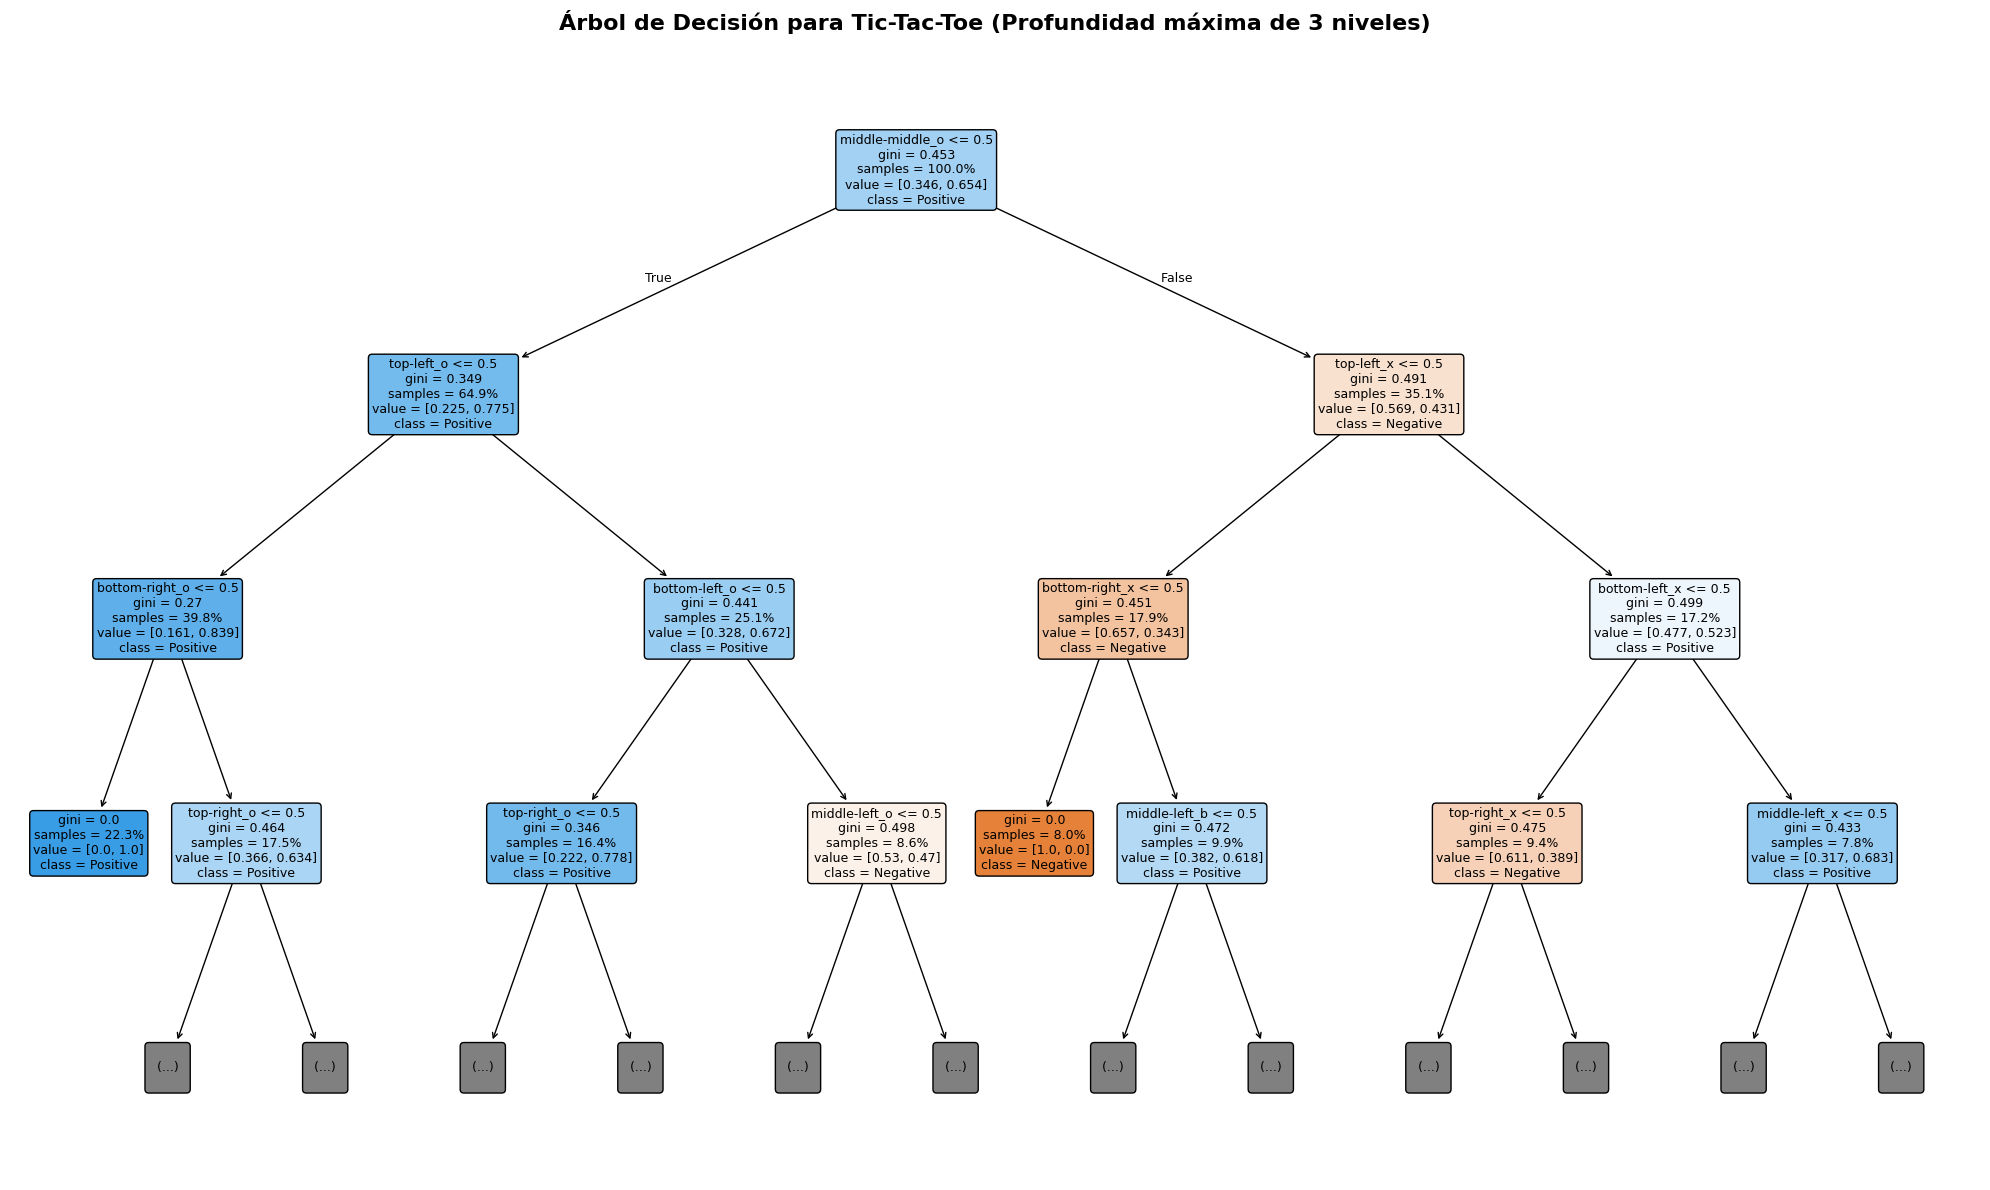

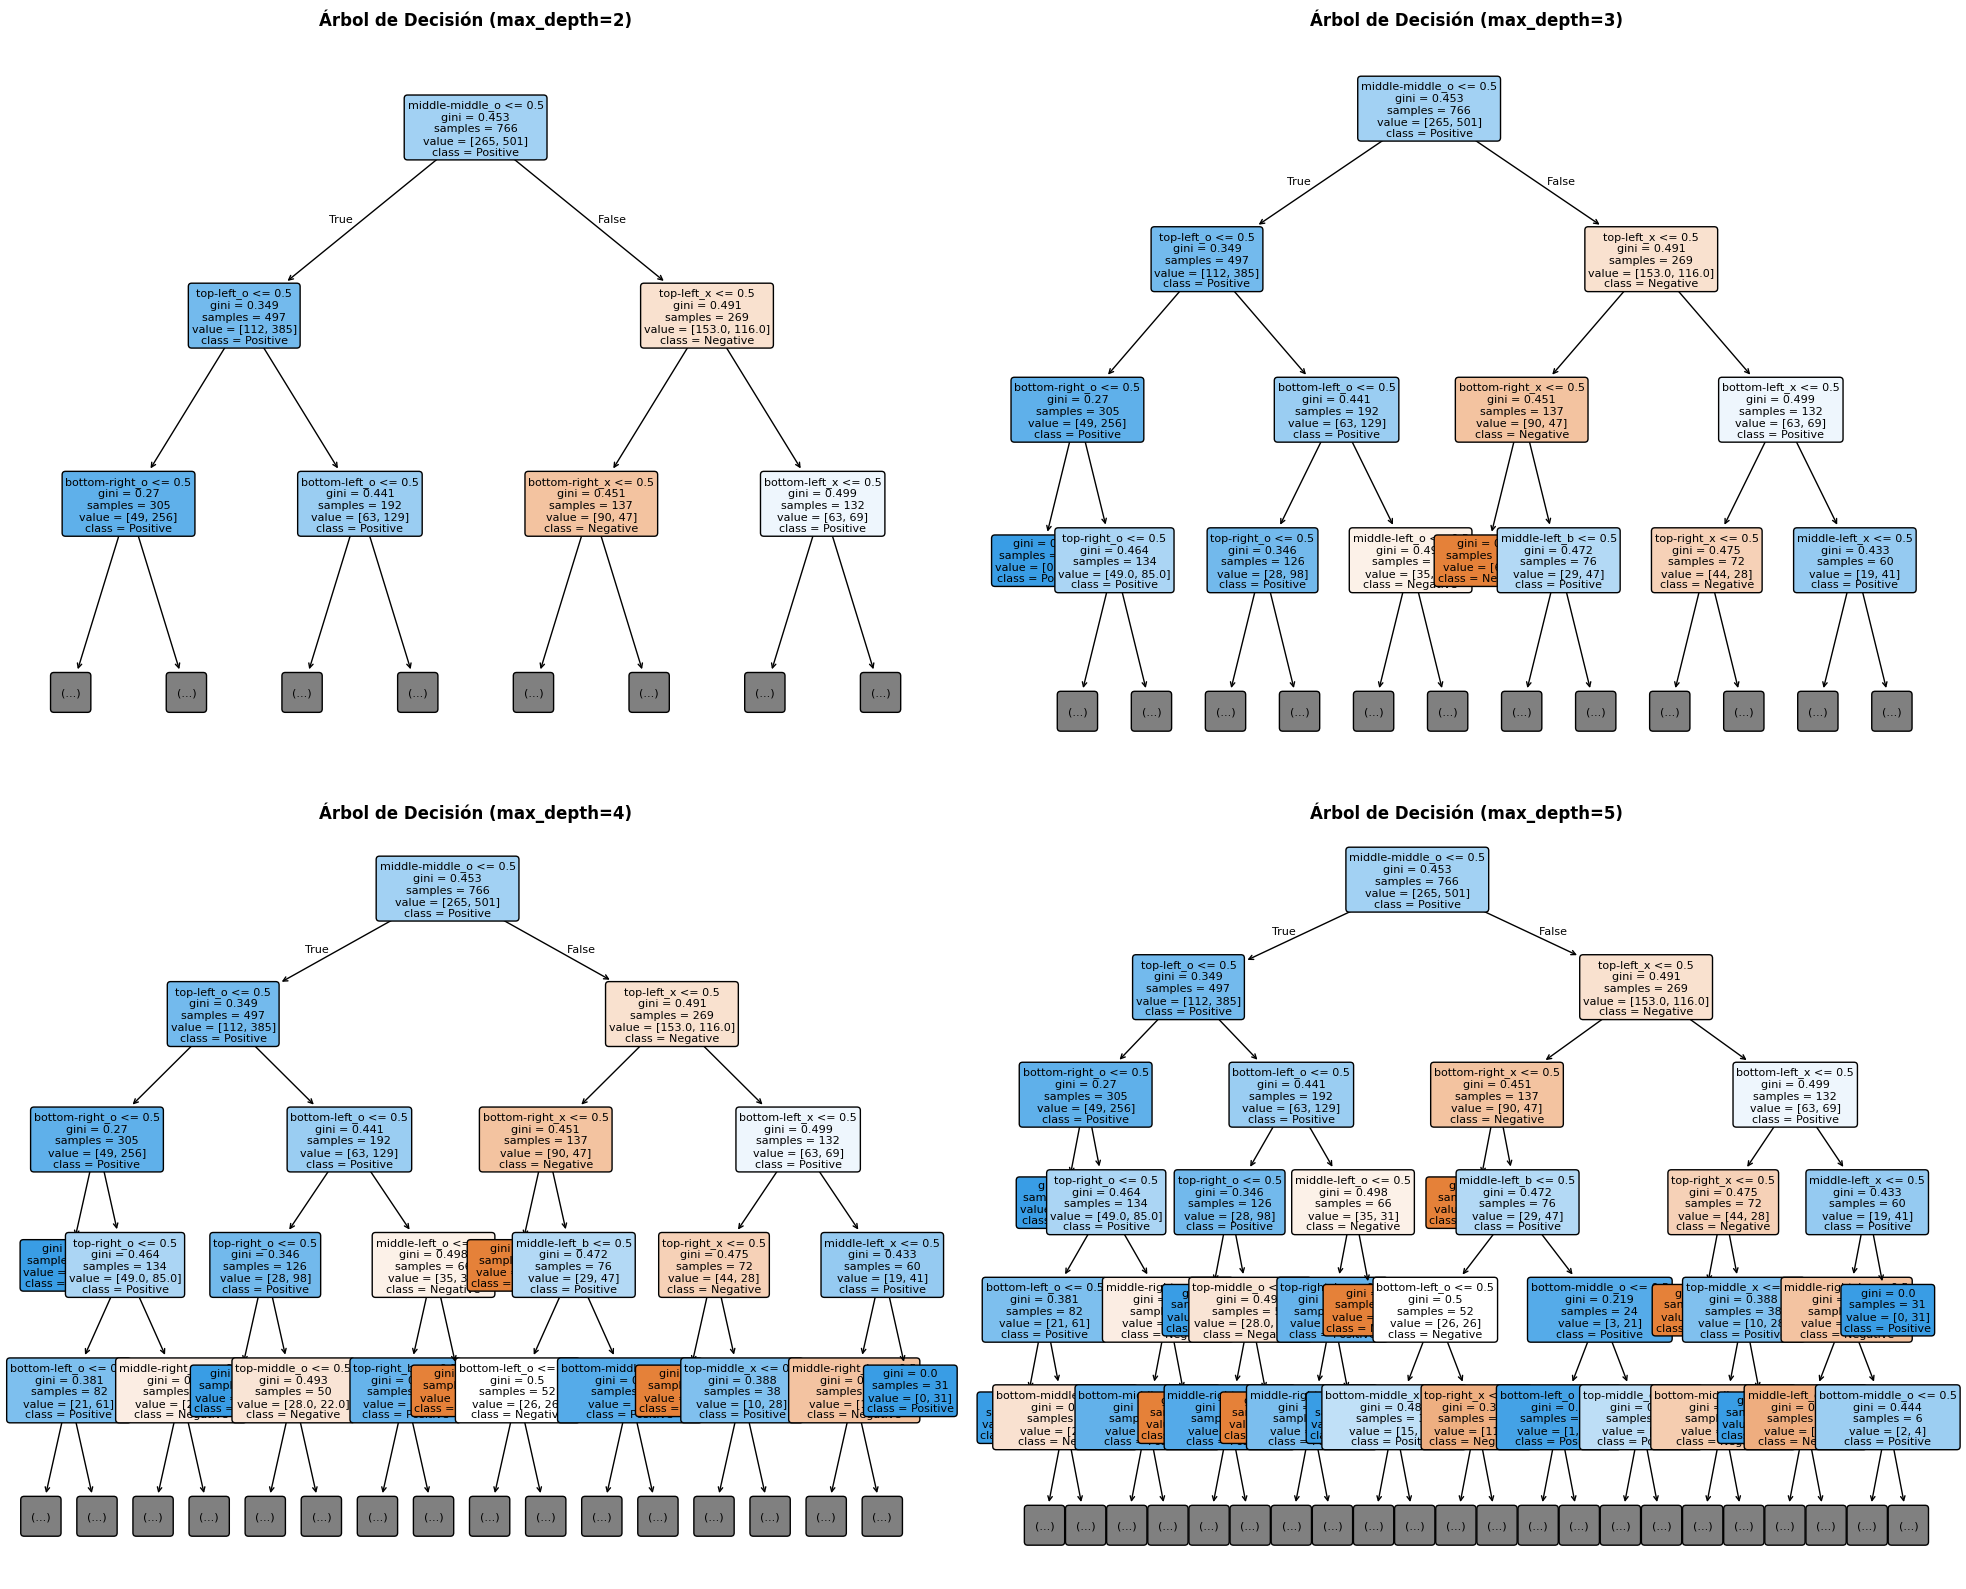

✓ Visualizaciones del árbol de decisión generadas.

Interpretación:
  - Los nodos de color naranja representan la clase 'Negative'
  - Los nodos de color azul representan la clase 'Positive'
  - La intensidad del color indica la pureza del nodo
  - 'samples' muestra cuántas muestras de entrenamiento llegaron a ese nodo
  - 'value' muestra la distribución de clases en ese nodo


In [4]:
# Visualización del Árbol de Decisión
# Visualizamos el árbol de decisión entrenado para entender las reglas que ha aprendido. 
# Dado que el árbol puede ser muy grande, limitaremos su profundidad (max_depth) 
# en la visualización para que sea legible.

plt.figure(figsize=(20, 12))
plot_tree(model_dt,
          feature_names=X_encoded.columns.tolist(),
          class_names=['Negative', 'Positive'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limitamos la profundidad para mejor visualización
          fontsize=9,
          impurity=True,
          proportion=True)
plt.title("Árbol de Decisión para Tic-Tac-Toe (Profundidad máxima de 3 niveles)", 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Visualización alternativa: árbol completo con menor profundidad
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

depths = [2, 3, 4, 5]
for idx, depth in enumerate(depths):
    ax = axes[idx // 2, idx % 2]
    plot_tree(model_dt,
              feature_names=X_encoded.columns.tolist(),
              class_names=['Negative', 'Positive'],
              filled=True,
              rounded=True,
              max_depth=depth,
              fontsize=8,
              ax=ax)
    ax.set_title(f'Árbol de Decisión (max_depth={depth})', 
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualizaciones del árbol de decisión generadas.")
print("\nInterpretación:")
print("  - Los nodos de color naranja representan la clase 'Negative'")
print("  - Los nodos de color azul representan la clase 'Positive'")
print("  - La intensidad del color indica la pureza del nodo")
print("  - 'samples' muestra cuántas muestras de entrenamiento llegaron a ese nodo")
print("  - 'value' muestra la distribución de clases en ese nodo")